In [213]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import gc
%matplotlib inline

## Load the dataset

In [75]:
train  = pd.read_csv('samples.csv',encoding='latin-1')
df = pd.DataFrame(train)

train = df.tail(3000)

pos =0
neg =0
for i in train['Sentiment']:
    if i == 0:
        neg +=1
    else:
        pos +=1

print("Number of poisitve reviews:",pos)
print("Number of negative reviews:",neg)


Number of poisitve reviews: 1765
Number of negative reviews: 1235


### Top 5 data from dataset

In [76]:
train.head()

,ItemID,Sentiment,SentimentText
22000,22012,1,@_JohnGalt_ KANYE!!! did you tell him he's got...
22001,22013,1,@_JOLIE_FILLE_ Nice review. Your turning into ...
22002,22014,0,@_Jon0 lol I said the exact same thing. Missed...
22003,22015,1,@_josh_thomas you are so cute omg i love you x...
22004,22016,0,@_JPeep_ everything on my itunes is gone


## Preprocessing

### 1. Function for removing words with a given pattern

In [77]:
#function for removing words with a given pattern
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt= re.sub(i,'',input_txt)
        
    return (input_txt)
    

### 2. removing usernames starting with @ 

In [78]:
#for removing all the usernames 
train2 = train 
tidy_tweet = []
for tweet in train2['SentimentText']:
    tweet = tweet.lower()
    tidy_tweet.append(remove_pattern(tweet,'@[\w]*'))
train2['tidy_tweet']= tidy_tweet

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### 3. for removing punctuations, numbers, apostrophes

In [79]:
#for removing punctuations, numbers  
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 4. Function for removing stop words & words with len <=2. Also tokenization.

In [132]:
stop_words = set(stopwords.words('english'))
def my_tokenizer(s):
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if len(t) > 3]
    return tokens

In [81]:
tokens = []
for sentence in train2['tidy_tweet']:
    tokens.append(my_tokenizer(sentence))

In [82]:
tokens

[['kanye', 'tell', 'got', 'nothing', 'stevie', 'twirls'],
 ['nice', 'review', 'turning', 'pretty', 'good', 'movie', 'critic'],
 ['lol',
  'said',
  'exact',
  'thing',
  'missed',
  'conan',
  'though',
  'tuned',
  'last',
  'minutes',
  'lol'],
 ['cute', 'omg', 'love', 'awesome', 'replied'],
 ['everything', 'itunes', 'gone'],
 ['awww', 'thanks'],
 ['lol', 'yeah', 'sorry', 'really', 'know', 'explain'],
 ['lol', 'nada', 'working', 'noww', 'life', 'lol'],
 ['susan',
  'boyle',
  'issue',
  'really',
  'help',
  'regarding',
  'capital',
  'assyria',
  'http',
  'tiny'],
 ['nah', 'yet'],
 ['life', 'looking', 'send', 'good', 'luck'],
 ['idea',
  'lazily',
  'tend',
  'wait',
  'get',
  'named',
  'look',
  'later',
  'though',
  'ton',
  'work',
  'morning',
  'tell'],
 ['free',
  'weekend',
  'wan',
  'sumthing',
  'fun',
  'havent',
  'fun',
  'long',
  'time'],
 ['nope', 'think', 'find', 'life', 'meaning', 'either', 'emo'],
 ['yeah',
  'hahaha',
  'picture',
  'really',
  'dark',
  'th

### 5. Function for reducing the length of the word by removing extra letters

In [83]:
#Fixing Word Length
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

### 6. Spelling Correction using SpellChecker()

In [84]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [85]:
from pattern.en import spelling

p1 = []
w1 = []
w2 = []
p2 = []
for sentence in tokens:
    for word in sentence:
        wordz = reduce_lengthening(word)
        #correct_word = spelling(wordz)
        if len(wordz)>1:
            w1.append(spell.correction(wordz))
        else:
            w1.append(spell.correction(word))
    p1.append(w1)
    w1 = []
p1


[['kane', 'tell', 'got', 'nothing', 'stevie', 'twirls'],
 ['nice', 'review', 'turning', 'pretty', 'good', 'movie', 'critic'],
 ['lol',
  'said',
  'exact',
  'thing',
  'missed',
  'conan',
  'though',
  'tuned',
  'last',
  'minutes',
  'lol'],
 ['cute', 'omg', 'love', 'awesome', 'replied'],
 ['everything', 'tunes', 'gone'],
 ['aww', 'thanks'],
 ['lol', 'yeah', 'sorry', 'really', 'know', 'explain'],
 ['lol', 'nada', 'working', 'now', 'life', 'lol'],
 ['susan',
  'boyle',
  'issue',
  'really',
  'help',
  'regarding',
  'capital',
  'assyria',
  'ttp',
  'tiny'],
 ['nah', 'yet'],
 ['life', 'looking', 'send', 'good', 'luck'],
 ['idea',
  'lazily',
  'tend',
  'wait',
  'get',
  'named',
  'look',
  'later',
  'though',
  'ton',
  'work',
  'morning',
  'tell'],
 ['free',
  'weekend',
  'wan',
  'something',
  'fun',
  'havent',
  'fun',
  'long',
  'time'],
 ['nope', 'think', 'find', 'life', 'meaning', 'either', 'emo'],
 ['yeah',
  'sahara',
  'picture',
  'really',
  'dark',
  'though

### 7. POS Tagging

In [93]:
tagged_tokens = []
for token in p1:
    tagged_tokens.append(pos_tag(token))

tagged_tokens

[[('kane', 'NN'),
  ('tell', 'NN'),
  ('got', 'VBD'),
  ('nothing', 'NN'),
  ('stevie', 'NN'),
  ('twirls', 'NN')],
 [('nice', 'JJ'),
  ('review', 'NN'),
  ('turning', 'VBG'),
  ('pretty', 'RB'),
  ('good', 'JJ'),
  ('movie', 'NN'),
  ('critic', 'NN')],
 [('lol', 'NN'),
  ('said', 'VBD'),
  ('exact', 'JJ'),
  ('thing', 'NN'),
  ('missed', 'VBD'),
  ('conan', 'JJ'),
  ('though', 'IN'),
  ('tuned', 'VBN'),
  ('last', 'JJ'),
  ('minutes', 'NNS'),
  ('lol', 'VBD')],
 [('cute', 'NN'),
  ('omg', 'MD'),
  ('love', 'VB'),
  ('awesome', 'RB'),
  ('replied', 'JJ')],
 [('everything', 'NN'), ('tunes', 'NNS'), ('gone', 'VBN')],
 [('aww', 'JJ'), ('thanks', 'NNS')],
 [('lol', 'NN'),
  ('yeah', 'NN'),
  ('sorry', 'VBP'),
  ('really', 'RB'),
  ('know', 'VBP'),
  ('explain', 'NN')],
 [('lol', 'NN'),
  ('nada', 'IN'),
  ('working', 'VBG'),
  ('now', 'RB'),
  ('life', 'NN'),
  ('lol', 'NN')],
 [('susan', 'JJ'),
  ('boyle', 'JJ'),
  ('issue', 'NN'),
  ('really', 'RB'),
  ('help', 'VB'),
  ('regarding', 'VB

### 8. Lemmatization

In [87]:
t1=[]
lemma=''
wordnet_lemmatizer = WordNetLemmatizer()
for tokens in tagged_tokens:
    for word, tag in tokens:
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma += word + ' '
        else:
            lemma += wordnet_lemmatizer.lemmatize(word,wntag)+ ' '
    t1.append(lemma)
    lemma=''

In [88]:
t1

['kane tell get nothing stevie twirl ',
 'nice review turn pretty good movie critic ',
 'lol say exact thing miss conan though tune last minute lol ',
 'cute omg love awesome replied ',
 'everything tune go ',
 'aww thanks ',
 'lol yeah sorry really know explain ',
 'lol nada work now life lol ',
 'susan boyle issue really help regard capital assyria ttp tiny ',
 'nah yet ',
 'life look send good luck ',
 'idea lazily tend wait get name look later though ton work morning tell ',
 'free weekend wan something fun havent fun long time ',
 'nope think find life mean either emo ',
 'yeah sahara picture really dark though would nice flash ',
 'want meet infamous mama gordon tell ',
 'still dead ',
 'lol amaze show show work this ',
 'hahahah hate school seriously rubbish week test like ahh ',
 'bore homework fun ',
 'delicious sweet sun tea tylee island sundew august know ',
 'best day dunno tho must find ',
 'nothing write co hop someone would like quote excited quote nothing ',
 'people us

In [133]:
train2['tidy_tweet'] = t1
train2['tidy_tweet']

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


22000                  kane tell get nothing stevie twirl 
22001           nice review turn pretty good movie critic 
22002    lol say exact thing miss conan though tune las...
22003                       cute omg love awesome replied 
22004                                  everything tune go 
22005                                          aww thanks 
22006                  lol yeah sorry really know explain 
22007                          lol nada work now life lol 
22008    susan boyle issue really help regard capital a...
22009                                             nah yet 
22010                            life look send good luck 
22011    idea lazily tend wait get name look later thou...
22012    free weekend wan something fun havent fun long...
22013                nope think find life mean either emo 
22014    yeah sahara picture really dark though would n...
22015                 want meet infamous mama gordon tell 
22016                                          still dea

### 9. Manual Correction

In [134]:
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("lol",'')
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("yep",'yes')
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("yea",'yes')
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("yeah","yes")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("yesh","yes")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("nope","no")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace('ttp','')
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("btw",'')

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [135]:
tokens = []
for sentence in train2['tidy_tweet']:
    tokens.append(my_tokenizer(sentence))

In [136]:
final = []
s = ''
for sentence in tokens:
    for words in sentence:
        s += words + ' '
    final.append(s)
    s=''
final

['kane tell nothing stevie twirl ',
 'nice review turn pretty good movie critic ',
 'exact thing miss conan though tune last minute ',
 'cute love awesome replied ',
 'everything tune ',
 'thanks ',
 'sorry really know explain ',
 'nada work life ',
 'susan boyle issue really help regard capital assyria tiny ',
 '',
 'life look send good luck ',
 'idea lazily tend wait name look later though work morning tell ',
 'free weekend something havent long time ',
 'think find life mean either ',
 'sahara picture really dark though would nice flash ',
 'want meet infamous mama gordon tell ',
 'still dead ',
 'amaze show show work ',
 'hahahah hate school seriously rubbish week test like ',
 'bore homework ',
 'delicious sweet tylee island sundew august know ',
 'best dunno must find ',
 'nothing write someone would like quote excited quote nothing ',
 'people usually enjoy kill even camera break people ',
 'thanks well ',
 'brilliant enjoy ',
 'ahhh embarassment stop reading ',
 'come thru twi

In [137]:
train2['tidy_tweet'] = final

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("iamsoannoyed","annoy")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("breakfastpizza","breakfast pizza")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("ahh",'')
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("soo","so")
train2['tidy_tweet'] = train2['tidy_tweet'].str.replace("aha",'')

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [140]:
train2['tidy_tweet']

22000                      kane tell nothing stevie twirl 
22001           nice review turn pretty good movie critic 
22002      exact thing miss conan though tune last minute 
22003                           cute love awesome replied 
22004                                     everything tune 
22005                                              thanks 
22006                           sorry really know explain 
22007                                      nada work life 
22008    susan boyle issue really help regard capital a...
22009                                                     
22010                            life look send good luck 
22011    idea lazily tend wait name look later though w...
22012             free weekend something havent long time 
22013                         think find life mean either 
22014     sra picture really dark though would nice flash 
22015                 want meet infamous mama gordon tell 
22016                                          still dea

In [141]:
tokens = []
for sentence in train2['tidy_tweet']:
    tokens.append(my_tokenizer(sentence))
final1= []
s = ''
for sentence in tokens:
    for words in sentence:
        s += words + ' '
    final1.append(s)
    s=''
final1

['kane tell nothing stevie twirl ',
 'nice review turn pretty good movie critic ',
 'exact thing miss conan though tune last minute ',
 'cute love awesome replied ',
 'everything tune ',
 'thanks ',
 'sorry really know explain ',
 'nada work life ',
 'susan boyle issue really help regard capital assyria tiny ',
 '',
 'life look send good luck ',
 'idea lazily tend wait name look later though work morning tell ',
 'free weekend something havent long time ',
 'think find life mean either ',
 'picture really dark though would nice flash ',
 'want meet infamous mama gordon tell ',
 'still dead ',
 'amaze show show work ',
 'hhah hate school seriously rubbish week test like ',
 'bore homework ',
 'delicious sweet tylee island sundew august know ',
 'best dunno must find ',
 'nothing write someone would like quote excited quote nothing ',
 'people usually enjoy kill even camera break people ',
 'thanks well ',
 'brilliant enjoy ',
 'embarassment stop reading ',
 'come thru twit paint answer 

In [142]:
train2['tidy_tweet'] = final1

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Constructing Dictionary  

In [143]:
word_index_map ={}
current_index =0
words = []

t2 = train2['tidy_tweet']
for sentence in t2:
    words.append(sentence.split())


for sentence in words:
    for word in sentence:
        if word not in word_index_map:
            word_index_map[word] = current_index
            current_index +=1

In [144]:
len(word_index_map)

3630

# Visualization 

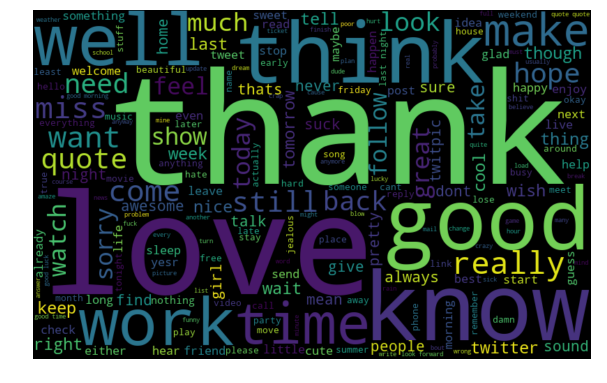

In [145]:
#Visualization
all_words = ' '.join([text for text in train2['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

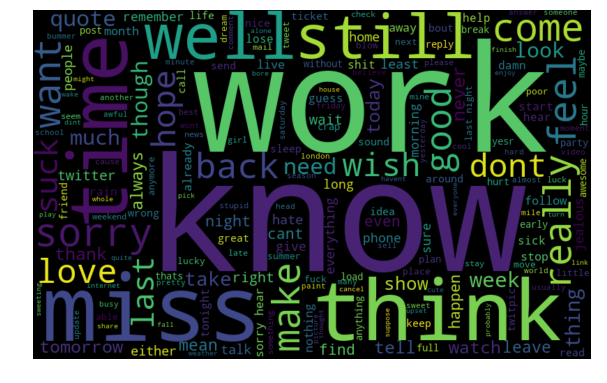

In [146]:
#negative words

negative_words = ' '.join([text for text in train2['tidy_tweet'][train2['Sentiment']==0]])
wordcloud = WordCloud(width=800, height=500).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

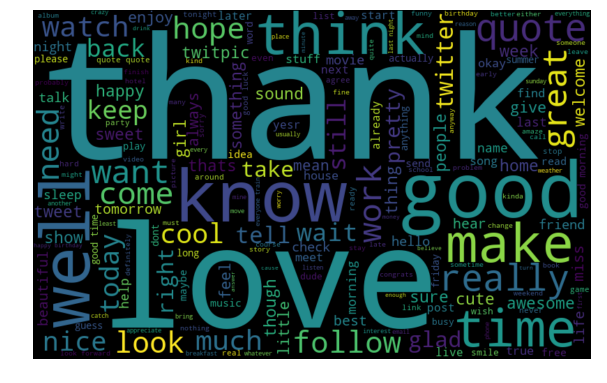

In [147]:
#positive words
positive_words = ' '.join([text for text in train2['tidy_tweet'][train2['Sentiment']==1]])
wordcloud = WordCloud(width=800, height=500).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Vectorization

In [148]:
def tokens_to_vectors(token, label):
    x = np.zeros(len(word_index_map) + 1)
    for t in token:
        i = word_index_map.get(t) #get the index of the word
        x[i]+=1  #get the corresponding frequency of the term 
    x = x/x.sum()    
    x[-1] = label
    return x

In [149]:
N = len(t1)
s = (N, len(word_index_map)+1)
from psutil import virtual_memory
mem = virtual_memory()
data=np.zeros(s,dtype=np.uint8)
i=0
for tt in train2['tidy_tweet'][train2['Sentiment']==1]:
    tokenize = tt.split()
    xy = tokens_to_vectors(tokenize,1)
    data[i,:] = xy
    i +=1

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [150]:
for tt in train2['tidy_tweet'][train2['Sentiment']==0]:
    tokenize = tt.split()
    xy = tokens_to_vectors(tokenize,0)
    data[i,:] = xy
    i+=1

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [151]:
data

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [201]:
np.random.shuffle(data)
X = data[:,:-1]
Y = data[:,-1]
Xtrain = X[:-500,]
Ytrain = Y[:-500,]
Xtest = X[-500:,]
Ytest = Y[-500:,]

In [202]:
pos=0
neg = 0
for i in Ytrain:
    if i == 1:
        pos +=1
    else:
        neg +=1

print("Number of positive reviews in training dataset:",pos)
print("Number of ngeative reviews in training dataset:",neg)

pos=0
neg = 0
for i in Ytest:
    if i == 1:
        pos +=1
    else:
        neg +=1

print("Number of positive reviews in testing dataset:",pos)
print("Number of ngeative reviews in testing dataset:",neg)

Number of positive reviews in training dataset: 1476
Number of ngeative reviews in training dataset: 1024
Number of positive reviews in testing dataset: 289
Number of ngeative reviews in testing dataset: 211


In [203]:
df = pd.DataFrame(data)
l= []
l= word_index_map.keys()
l1 = []
for i in l:
    l1.append(i)
l1.append('label')
df.columns = l1
print(df.head())
#df.to_csv('twitter_pp.csv')

   kane  tell  nothing  stevie  twirl  nice  review  turn  pretty  good  ...  \
0     0     0        0       0      0     0       0     0       0     0  ...   
1     0     0        0       0      0     0       0     0       0     0  ...   
2     0     0        0       0      0     0       0     0       0     0  ...   
3     0     0        0       0      0     0       0     0       0     0  ...   
4     0     0        0       0      0     0       0     0       0     0  ...   

   mandatory  interstate  exit  compete  fifth  championship  vouch  tort  \
0          0           0     0        0      0             0      0     0   
1          0           0     0        0      0             0      0     0   
2          0           0     0        0      0             0      0     0   
3          0           0     0        0      0             0      0     0   
4          0           0     0        0      0             0      0     0   

   property  label  
0         0      1  
1         0   

# Implementing Models

## 1. Logistic Regression

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
model = LogisticRegression()
model.fit(Xtrain,Ytrain)

C:\Users\Vidhi Bansal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [206]:
model.score(Xtest, Ytest)

0.578

In [207]:
model.score(Xtrain, Ytrain)

0.6224

## 2. Naive Bayes

In [208]:
from sklearn.naive_bayes import MultinomialNB

In [209]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [210]:
print("Accuracy for testing dataset:",model.score(Xtest,Ytest))
print("Accuracy for training dataset:",model.score(Xtrain,Ytrain))

Accuracy for testing dataset: 0.578
Accuracy for training dataset: 0.6224


In [214]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

Using TensorFlow backend.


In [226]:
embedding_size=32
model=Sequential()
model.add(Embedding(len(word_index_map), embedding_size, input_length=3630))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 3630, 32)          116160    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 169,461
Trainable params: 169,461
Non-trainable params: 0
_________________________________________________________________
None


In [227]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [228]:
batch_size = 64
num_epochs = 3

X_valid, y_valid = Xtrain[:batch_size], Ytrain[:batch_size]
X_train2, y_train2 = Xtrain[batch_size:], Ytrain[batch_size:]

model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Train on 2436 samples, validate on 64 samples
Epoch 1/3
2436/2436 [==============================] - 326s 134ms/step - loss: 0.6796 - acc: 0.5895 - val_loss: 0.6711 - val_acc: 0.6250
Epoch 2/3
2436/2436 [==============================] - 385s 158ms/step - loss: 0.6784 - acc: 0.5895 - val_loss: 0.6645 - val_acc: 0.6250
Epoch 3/3
2436/2436 [==============================] - 412s 169ms/step - loss: 0.6774 - acc: 0.5895 - val_loss: 0.6643 - val_acc: 0.6250
